In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
# Data Cleaning
df_1 = pd.read_csv("Bengaluru_House_Price_Data.csv")
df_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df_1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df_2=df_1.drop(['area_type','availability','society','balcony','availability'],axis='columns')
df_2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df_3=df_2.dropna()

In [7]:
df_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df_4=df_3.copy()
df_4['BHK']=df_3['size'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
df_5=df_4.drop(['size'],axis='columns')

In [10]:
df_5.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [11]:
df_5['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df_5[df_5['BHK']>15]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
4684,Munnekollal,2400,40.0,660.0,43
11559,1Kasavanhalli,1200,18.0,200.0,18


In [13]:
df_6=df_5[df_5['BHK']<17]

In [14]:
df_6.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [15]:
df_6.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        tokens=x.split('-')
        if len(tokens)==2:
            return (float(tokens[0])+float(tokens[1]))/2
    else:
        return None
        

In [17]:
df_7=df_6.copy()
df_7['total_sqft']=df_6['total_sqft'].apply(convert_sqft_to_num)

In [18]:
df_7.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
df_8=df_7.copy()
df_8['price_per_sqft']=df_8['price']*100000/df_7['total_sqft']
df_8.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [20]:
len(df_8.location.unique())

1301

In [21]:
df_8['location']=df_8['location'].apply(lambda x: x.strip())

location_stats=df_8.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
Kanakapura Road,                 1
1 Giri Nagar                     1
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
whitefiled                       1
Name: location, Length: 1290, dtype: int64

In [22]:
len(location_stats[location_stats<10])

1036

In [23]:
location_stats_less_than_10=location_stats[location_stats<10]
location_stats_less_than_10

location
Yemlur                         9
Kaverappa Layout               9
Peenya                         9
Chennammana Kere               9
Ejipura                        9
                              ..
Kanakapura Road,               1
1 Giri Nagar                   1
Karnataka Shabarimala          1
Kasthuri Nagar East Of NGEF    1
whitefiled                     1
Name: location, Length: 1036, dtype: int64

In [24]:
df_8['location']=df_8.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_8.location.unique())

255

In [25]:
df_8.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [26]:
df_8[df_8.total_sqft/df_8.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [27]:
df_9=df_8[~(df_8.total_sqft/df_8.BHK<300)]
df_9.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [28]:
df_9.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df_10=remove_pps_outliers(df_9)
df_10.shape

(10222, 6)

In [30]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='o',color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

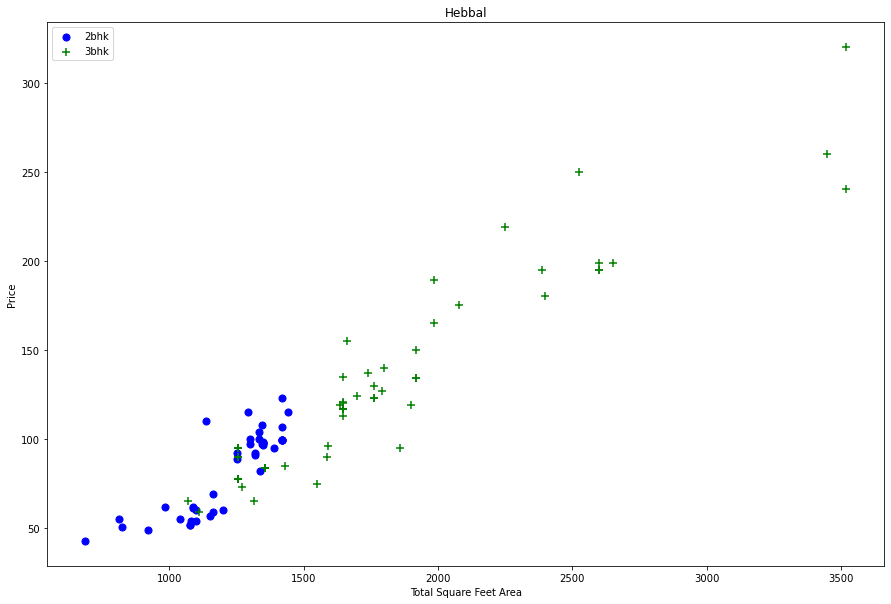

In [31]:
plot_scatter_chart(df_10,"Hebbal")

In [32]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'sd':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for BHK,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')               

df_11=remove_bhk_outliers(df_10)
df_11.shape

(7369, 6)

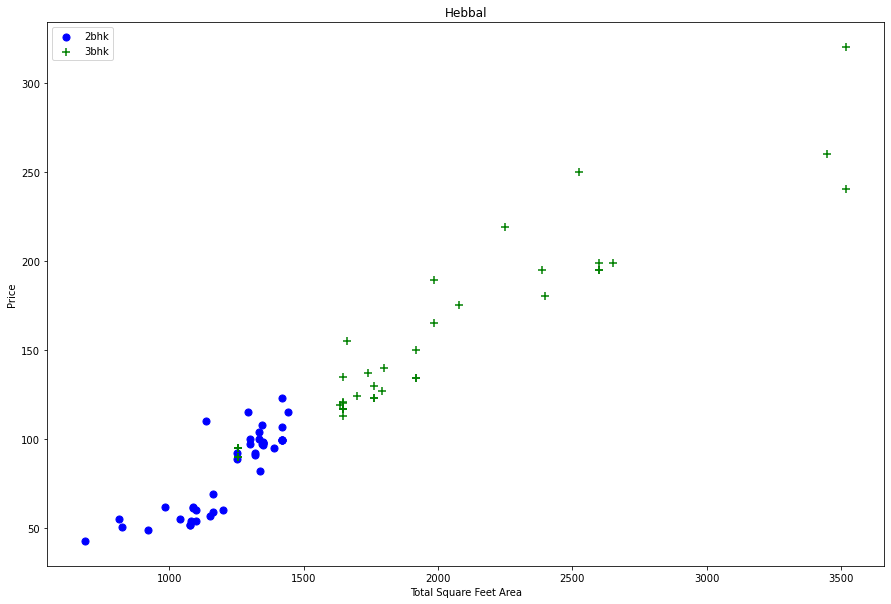

In [33]:
plot_scatter_chart(df_11,"Hebbal")

Text(0, 0.5, 'Count')

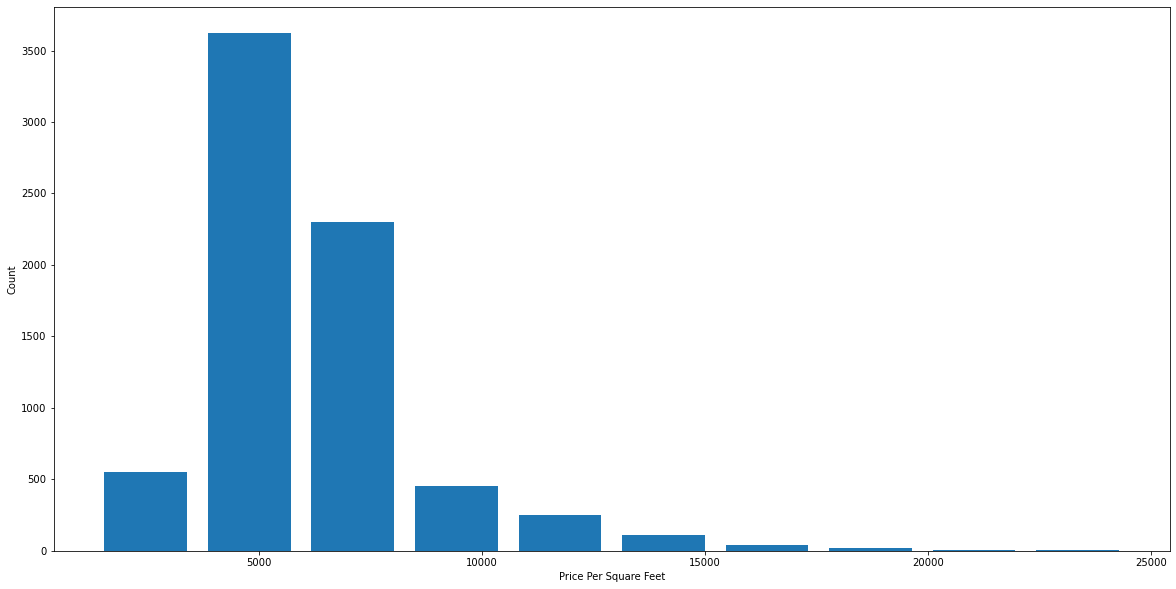

In [34]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df_11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [35]:
df_11.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [36]:
df_11[df_11.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8547,other,12000.0,12.0,525.0,10,4375.000000
8633,other,10000.0,16.0,550.0,16,5500.000000
9329,other,6000.0,12.0,150.0,11,2500.000000
9642,other,5425.0,13.0,275.0,13,5069.124424


In [37]:
df_12=df_11[df_11.bath<df_11.BHK+2]
df_12.shape

(7291, 6)

In [38]:
df_13=df_12.drop('price_per_sqft',axis='columns')
df_13.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [39]:
dummies=pd.get_dummies(df_13.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_14=pd.concat([df_13,dummies.drop('other',axis='columns')],axis='columns')
df_14.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_14.shape

(7291, 259)

In [42]:
df_15=df_14.drop('location',axis='columns')
df_15.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df=df_15

In [44]:
X=df.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y=df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8556662450160801

In [49]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

In [50]:
def best_model_using_gridsearchcv(X,y):
    algorithms={
        'linear_regression':{
            'model':make_pipeline(StandardScaler(with_mean=False), LinearRegression()),
            'params':{}
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(criterion='squared_error'),
            'params':{
                'splitter':['best','random']
            }
        }
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853445,{}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.694653,{'splitter': 'random'}


In [51]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [52]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    
    return model.predict([x])[0]

In [53]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\Archisman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.10543612203395

In [54]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\Archisman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.16322432858678

In [57]:
# import pickle
# with open('Real_Estate_House_Prediction.pickle','wb') as f:
#     pickle.dump(model,f)

In [56]:
# import json
# columns={
#     'data_columns':[col for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))
